In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import warnings 
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from scipy import sparse
from imblearn.over_sampling import RandomOverSampler
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data = pd.read_csv("careermitra_dataset.csv")
data.head()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,...,Interested Type of Books,Salary Range Expected,In a Realtionship?,Gentle or Tuff behaviour?,Management or Technical,Salary/work,hard/smart worker,worked in teams ever?,Introvert,Suggested Job Role
0,69,63,78,87,94,94,87,84,61,9,...,Prayer books,salary,no,stubborn,Management,salary,hard worker,yes,no,Database Developer
1,78,62,73,60,71,70,73,84,91,12,...,Childrens,salary,yes,gentle,Technical,salary,hard worker,no,yes,Portal Administrator
2,71,86,91,87,61,81,72,72,94,11,...,Travel,Work,no,stubborn,Management,work,hard worker,no,yes,Portal Administrator
3,76,87,60,84,89,73,62,88,69,7,...,Romance,Work,yes,gentle,Management,work,smart worker,yes,yes,Systems Security Administrator
4,92,62,90,67,71,89,73,71,73,4,...,Cookbooks,salary,no,stubborn,Management,work,hard worker,yes,yes,Business Systems Analyst


In [41]:
data.describe()

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills,Hours working per day,Logical quotient rating,hackathons,coding skills rating,public speaking points
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,77.002300,76.948200,77.017550,77.094500,76.958200,77.015550,77.069850,76.913100,76.921450,7.985950,4.995050,2.992650,5.004750,5.012800
std,10.085697,10.101733,10.134815,10.087837,10.020088,10.168888,10.069059,10.138555,10.103494,2.593798,2.578383,2.005791,2.576831,2.588875
min,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,60.000000,4.000000,1.000000,0.000000,1.000000,1.000000
25%,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,68.000000,6.000000,3.000000,1.000000,3.000000,3.000000
50%,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,8.000000,5.000000,3.000000,5.000000,5.000000
75%,86.000000,86.000000,86.000000,86.000000,85.000000,86.000000,86.000000,86.000000,86.000000,10.000000,7.000000,5.000000,7.000000,7.000000
max,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,12.000000,9.000000,6.000000,9.000000,9.000000


In [5]:
x = data.iloc[:,0:9]
y = data.iloc[:,-1]

In [6]:
x

,Acedamic percentage in Operating Systems,percentage in Algorithms,Percentage in Programming Concepts,Percentage in Software Engineering,Percentage in Computer Networks,Percentage in Electronics Subjects,Percentage in Computer Architecture,Percentage in Mathematics,Percentage in Communication skills
0,69,63,78,87,94,94,87,84,61
1,78,62,73,60,71,70,73,84,91
2,71,86,91,87,61,81,72,72,94
3,76,87,60,84,89,73,62,88,69
4,92,62,90,67,71,89,73,71,73
...,...,...,...,...,...,...,...,...,...
19995,83,67,62,63,81,74,90,84,69
19996,80,69,83,87,82,66,66,92,67
19997,83,70,80,87,64,85,69,94,88
19998,68,87,91,88,66,74,61,87,61


C:\Users\HP\AppData\Local\Temp\ipykernel_11468\823103717.py:2: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  chart.set_xticklabels(chart.get_xticklabels(),rotation=90)


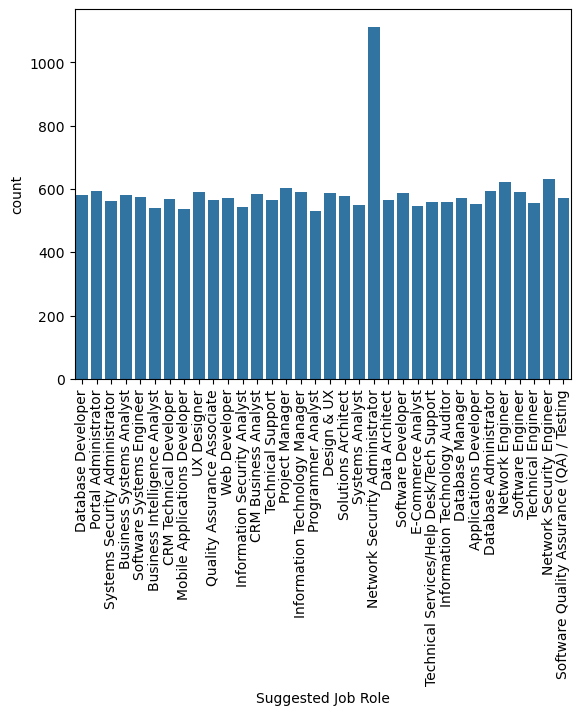

In [7]:
chart = sns.countplot(x=y)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [8]:
warnings.filterwarnings("ignore")

In [9]:
X = OneHotEncoder().fit_transform(x)
Y = y.copy(deep=True)

In [10]:
X

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 180000 stored elements and shape (20000, 315)>

In [11]:
X2 = StandardScaler(with_mean=False).fit_transform(X)
y2 = y.copy(deep=True)
X2.shape

(20000, 315)

In [12]:
y_trans = y.copy(deep=True)
y_trans

0                               Database Developer
1                             Portal Administrator
2                             Portal Administrator
3                   Systems Security Administrator
4                         Business Systems Analyst
                           ...                    
19995                           Technical Engineer
19996                           E-Commerce Analyst
19997                Business Intelligence Analyst
19998    Software Quality Assurance (QA) / Testing
19999                       Applications Developer
Name: Suggested Job Role, Length: 20000, dtype: object

In [13]:
Y1=LabelEncoder().fit_transform(y_trans)
Y2=np.asarray(y_trans)
Y2

array(['Database Developer', 'Portal Administrator',
       'Portal Administrator', ..., 'Business Intelligence Analyst',
       'Software Quality Assurance (QA) / Testing',
       'Applications Developer'], dtype=object)

In [14]:
CRM_Managerial_Roles = ['CRM Business Analyst','CRM Technical Developer','Project Manager','Information Technology Manager']
Analyst = ['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst']
Mobile_Applications_Web_Development = ['Mobile Applications Developer','Web Developer','Applications Developer']
QA_Testing = ['Software Quality Assurance (QA) / Testing','Quality Assurance Associate']
UX_Design = ['UX Designer','Design & UX']
Databases = ['Database Developer','Database Administrator','Database Manager','Portal Administrator']
Programming_Systems_Analyst = ['Programmer Analyst','Systems Analyst']
Networks_Systems = ['Network Security Administrator','Network Security Engineer','Network Engineer',
                    'Systems Security Administrator','Software Systems Engineer','Information Security Analyst']
SE_SDE = ['Software Engineer','Software Developer']
Technical_Support_Service = ['Technical Engineer','Technical Services/Help Desk/Tech Support','Technical Support']
others = ['Solutions Architect','Data Architect','Information Technology Auditor']

In [15]:
y_trans = y_trans.replace(['CRM Business Analyst','CRM Technical Developer','Project Manager',
                    'Information Technology Manager'],'CRM/Managerial Roles')
y_trans = y_trans.replace(['Business Systems Analyst','Business Intelligence Analyst','E-Commerce Analyst'],'Analyst')
y_trans = y_trans.replace(['Mobile Applications Developer','Web Developer',
                    'Applications Developer'],'Mobile Applications/ Web Development')
y_trans = y_trans.replace(['Software Quality Assurance (QA) / Testing','Quality Assurance Associate'],'QA/Testing')
y_trans = y_trans.replace(['UX Designer','Design & UX'] , 'UX/Design')
y_trans = y_trans.replace(['Database Developer','Database Administrator',
                    'Database Manager','Portal Administrator'] , 'Databases')
y_trans = y_trans.replace(['Programmer Analyst','Systems Analyst'],'Programming/ Systems Analyst')
y_trans = y_trans.replace(['Network Security Administrator','Network Security Engineer',
                    'Network Engineer','Systems Security Administrator',
                    'Software Systems Engineer','Information Security Analyst'],'Networks/ Systems')
y_trans = y_trans.replace(['Software Engineer','Software Developer'] ,'SE/SDE')
y_trans = y_trans.replace(['Technical Engineer','Technical Services/Help Desk/Tech Support',
                    'Technical Support'],'Technical Support/Service')
y_trans = y_trans.replace(['Solutions Architect','Data Architect','Information Technology Auditor'],'others')
y_trans

0                                   Databases
1                                   Databases
2                                   Databases
3                           Networks/ Systems
4                                     Analyst
                         ...                 
19995               Technical Support/Service
19996                                 Analyst
19997                                 Analyst
19998                              QA/Testing
19999    Mobile Applications/ Web Development
Name: Suggested Job Role, Length: 20000, dtype: object

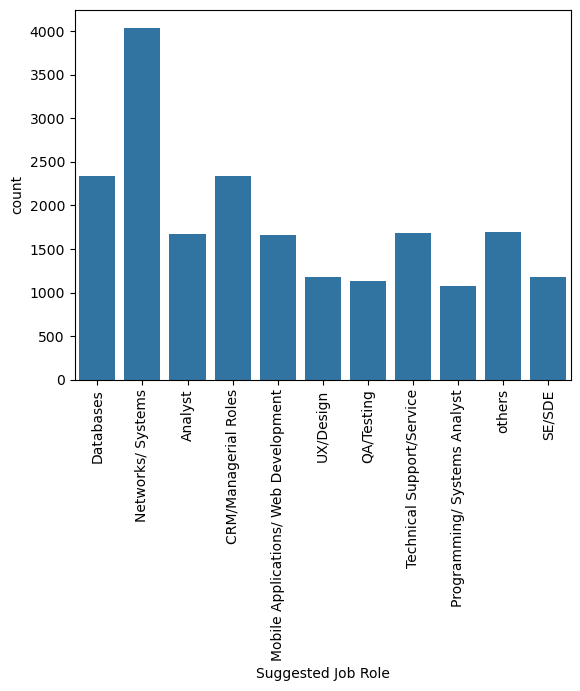

In [16]:
chart = sns.countplot(x=y_trans)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [17]:
X3 = sparse.csr_matrix.copy(X2)
y3 = y_trans.copy(deep=True)
X3.shape

(20000, 315)

In [18]:
ros = RandomOverSampler(random_state=42)
X_ovs, y_ovs = ros.fit_resample(X3, y3)

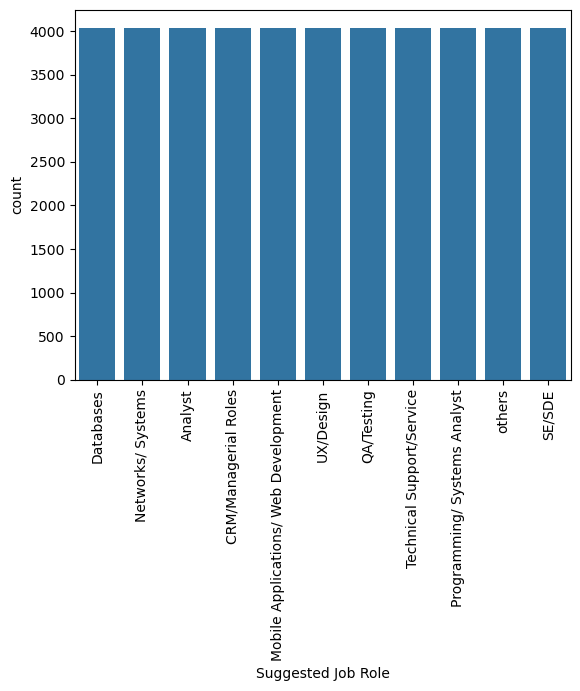

In [19]:
chart = sns.countplot(x=y_ovs)
chart.set_xticklabels(chart.get_xticklabels(),rotation=90)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_ovs,y_ovs,test_size=0.2)

In [21]:
X_train.dtype

dtype('float64')

In [22]:
clf = MLPClassifier(activation='tanh', hidden_layer_sizes = (50,50,50), solver = 'adam') #, random_state=1)
clf.fit(X_train,y_train)
print("Training Accuracy Score: ",accuracy_score(clf.predict(X_train),y_train))
print("Testing Accuracy Score: ",accuracy_score(clf.predict(X_test),y_test))

Training Accuracy Score:  0.9821518916184159
Testing Accuracy Score:  0.7794266441821248


In [24]:
x.loc[-1]=[69,93,67,78,89,78,94,75,67]
x.index=x.index+1
x=x.sort_index()
x.shape

(20001, 9)

In [25]:
new_data = OneHotEncoder().fit_transform(x)
new_data = StandardScaler(with_mean=False).fit_transform(new_data)
new_data = sparse.csr_matrix.copy(new_data)
output=clf.predict(new_data[1])
output

array(['Databases'], dtype='<U36')